# **Plant_Disease_Prediction**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

**LOADING DATASET**

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


**PLOT IMAGE**

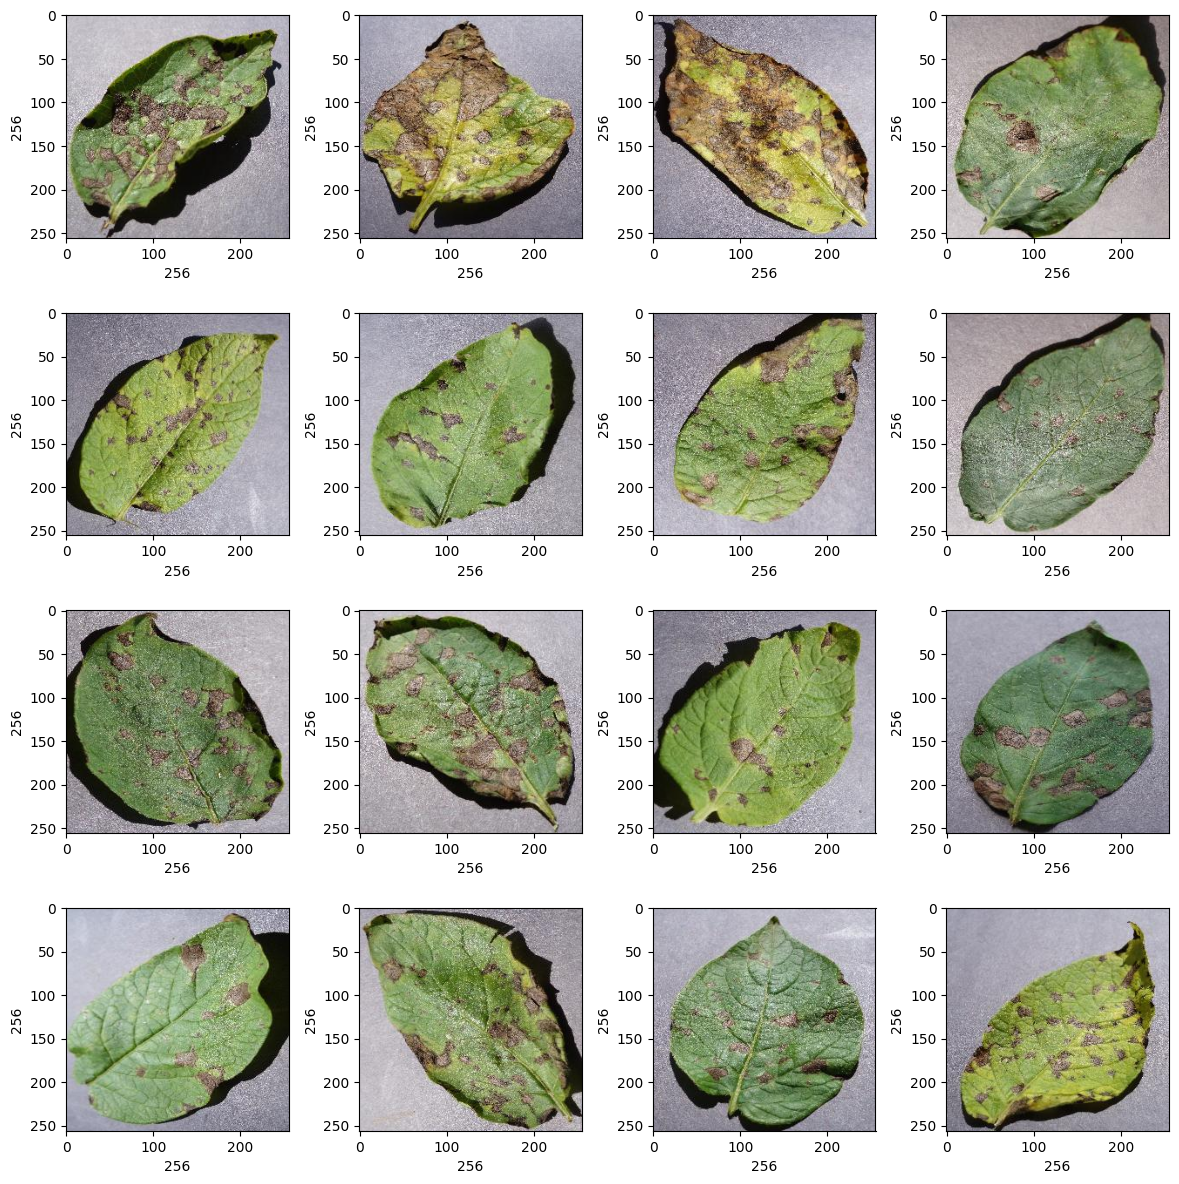

In [3]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

**convert image to array**

In [4]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
dir = "/content/drive/My Drive/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Tomato___Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

**checking dataset balanced or not**

In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

**check shape of the image**

In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(900,)

**splitting dataset**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

**Normalizing dataset**

In [10]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

**Encoding**

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**MODEL**

**CNN-convolutional neural network**

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

**Metrics**

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [14]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

# Training

In [15]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 14s 469ms/step - loss: 1.0414 - accuracy: 0.5191 - val_loss: 0.9628 - val_accuracy: 0.5694
Epoch 2/50
5/5 [==============================] - 1s 183ms/step - loss: 0.8797 - accuracy: 0.6424 - val_loss: 0.8137 - val_accuracy: 0.6597
Epoch 3/50
5/5 [==============================] - 1s 175ms/step - loss: 0.7250 - accuracy: 0.8177 - val_loss: 0.6579 - val_accuracy: 0.8958
Epoch 4/50
5/5 [==============================] - 1s 218ms/step - loss: 0.5921 - accuracy: 0.9271 - val_loss: 0.5436 - val_accuracy: 0.9028
Epoch 5/50
5/5 [==============================] - 1s 158ms/step - loss: 0.4869 - accuracy: 0.9288 - val_loss: 0.4561 - val_accuracy: 0.9097
Epoch 6/50
5/5 [==============================] - 1s 140ms/step - loss: 0.4018 - accuracy: 0.9323 - val_loss: 0.3860 - val_accuracy: 0.9167
Epoch 7/50
5/5 [==============================] - 1s 138ms/step - loss: 0.3346 - accuracy: 0.9358 - val_loss: 0.3382 - val_accuracy: 0.9097
Epoch 8/50
5/5 [===

**Save the model**

In [16]:
model.save("/content/drive/My Drive/plant_disease.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Plot train accuracy vs val accuracy**

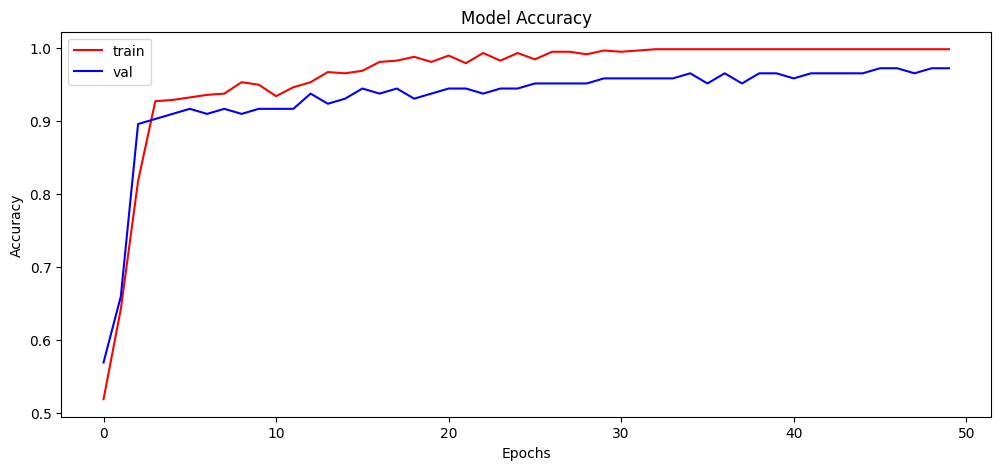

In [17]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

**EVALUATE THE MODEL**

In [26]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 21ms/step - loss: 0.0490 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


In [19]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 16ms/step


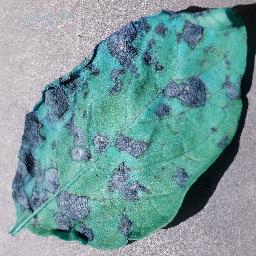

In [28]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

**FINAL PREDICTION**

In [29]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato___Early_blight
Predicted :  Potato___Early_blight
